![](https://xakep.ru/wp-content/uploads/2018/01/150493/Green-Python-h.jpg)

# Библиотека Pandas

![](http://tripkendall.com/wp-content/uploads/2018/01/pandas_logo-1080x675.jpg)

[Pandas](http://pandas.pydata.org/) - библиотека для обработки и анализа данных. Предназначена для данных разной природы - матричных, панельных данных, временных рядов. Претендует на звание самого мощного и гибкого средства для анализа данных с открытым исходным кодом.

In [2]:
import pandas as pd

OSError: [WinError 193] %1 не является приложением Win32

## Загрузка и запись данных
Функции типа .read_формат и .to_формат считывают и записывают данные соответственно. Полный список можно найти в документации:
http://pandas.pydata.org/pandas-docs/stable/io.html

Научимся считывать данные в формате csv (comma separated value) функцией:

- [pd.read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv): 

Аргументов у нее очень много, критически важные:
 - **filepath_or_buffer** - текстовая строка с названием (адресом) файла
 - **sep** - разделитель между данными
 - **header** - номер строки, в которой в файле указаны названия столбцов, None, если нет
 - **names** - список с названиями колонок
 - **index_col** - или номер столбца, или список,  или ничего - названия строк

![](https://i.pinimg.com/originals/54/62/bd/5462bd4d6ec6150ce91fbc70ac46d5f7.jpg)

In [6]:
train = pd.read_csv('00_titanic_train.csv')

In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Описание данных

| Variable | Definition | Key |
|----------|------------|-----|
|survival | Survival | 0 = No <br> 1 = Yes|
|pclass | Ticket class | 1 = 1st = Upper <br> 2 = 2nd = Middle <br> 3 = 3rd = Lower |
|sex | Sex | |
|Age | Age in years |  |
|sibsp | # of siblings <br> spouses aboard the Titanic | |
|parch | # of parents <br> children aboard the Titanic | |
|ticket | Ticket number | |
|fare | Passenger fare | |
|cabin | Cabin number | |
|embarked | Port of Embarkation | C = Cherbourg <br> Q = Queenstown <br> S = Southampton|

<b>age</b><br>
    Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

<b>sibsp</b><br>
    The dataset defines family relations in this way...<br>
    Sibling = brother, sister, stepbrother, stepsister<br>
    Spouse = husband, wife (mistresses and fiancés were ignored)

<b>parch</b><br>
    The dataset defines family relations in this way...<br>
    Parent = mother, father<br>
    Child = daughter, son, stepdaughter, stepson<br>
    Some children travelled only with a nanny, therefore parch=0 for them.

## pandas: head, tail

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
    
```python
DataFrame.head(n=5)
```
Return the first n rows.

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


---
## pandas: shape

In [9]:
train.shape

(891, 12)

---
## pandas: columns, index


In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
train.index

NameError: name 'train' is not defined

## pandas: T/transpose()

In [12]:
train.head(4).T

,0,1,2,3
PassengerId,1,2,3,4
Survived,0,1,1,1
Pclass,3,1,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)"
Sex,male,female,female,female
Age,22,38,26,35
SibSp,1,1,0,1
Parch,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803
Fare,7.25,71.2833,7.925,53.1


In [13]:
train.head(4).transpose()

,0,1,2,3
PassengerId,1,2,3,4
Survived,0,1,1,1
Pclass,3,1,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)"
Sex,male,female,female,female
Age,22,38,26,35
SibSp,1,1,0,1
Parch,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803
Fare,7.25,71.2833,7.925,53.1


In [14]:
transpose_train = train.T

In [15]:
transpose_train.index

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

---
## pandas: info

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


---
## pandas: describe

In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train.describe(percentiles=[0.9, 0.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
99%,882.100000,1.000000,3.000000,65.870000,5.000000,4.000000,249.006220
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---
## pandas: Series

In [8]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [9]:
type(train['Name'])

pandas.core.series.Series

In [10]:
## как пройти циклом for по всем именам? и вывести например всех 'John'
for i in train['Name']:
    if ('John ' in i) or (i.endswith('John')):
        print(i)

Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)
Rogers, Mr. William John
Doling, Mrs. John T (Ada Julia Bone)
Barton, Mr. David John
Turpin, Mr. William John Robert
Cribb, Mr. John Hatfield
Bengtsson, Mr. John Viktor
Goldsmith, Master. Frank John William "Frankie"
Baumann, Mr. John D
Bourke, Mr. John
Perkin, Mr. John Henry
Mellors, Mr. William John
Lovell, Mr. John Hall ("Henry")
Sage, Mr. George John Jr
Goldsmith, Mrs. Frank John (Emily Alice Brown)
Adams, Mr. John
Matthews, Mr. William John
Smart, Mr. John Montgomery
Farthing, Mr. John
Goldsmith, Mr. Frank John
Davies, Master. John Morgan Jr
Thayer, Mr. John Borland Jr
Simmons, Mr. John
Flynn, Mr. John Irwin ("Irving")
Rush, Mr. Alfred George John
Thayer, Mrs. John Borland (Marian Longstreth Morris)
Ross, Mr. John Hugo
Jarvis, Mr. John Denzil
Chapman, Mr. John Henry
Horgan, Mr. John
Bowen, Mr. David John "Dai"
Bourke, Mrs. John (Catherine)
Weir, Col. John
Thayer, Mr. John B

---

## pandas: map

In [22]:
'skillfactory'

'skillfactory'

In [23]:
len('skillfactory')

12

In [11]:
train['Name'].map(len)

0      23
1      51
2      22
3      44
4      24
5      16
6      23
7      30
8      49
9      35
10     31
11     24
12     30
13     27
14     36
15     32
16     20
17     28
18     55
19     23
20     20
21     21
22     27
23     28
24     29
25     57
26     23
27     30
28     29
29     19
       ..
861    27
862    51
863    33
864    22
865    24
866    28
867    36
868    27
869    31
870    17
871    48
872    24
873    27
874    37
875    32
876    29
877    20
878    18
879    45
880    44
881    18
882    28
883    29
884    22
885    36
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [12]:
def is_Mr(s):
    return 'Mr.' in s

In [13]:
is_Mr('Mr. machine learning')

True

In [14]:
train['Name'].map(lambda s: 'Mr. ' in s)

0       True
1      False
2      False
3      False
4       True
5       True
6       True
7      False
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16     False
17      True
18     False
19     False
20      True
21      True
22     False
23      True
24     False
25     False
26      True
27      True
28     False
29      True
       ...  
861     True
862    False
863    False
864     True
865    False
866    False
867     True
868     True
869    False
870     True
871    False
872     True
873     True
874    False
875    False
876     True
877     True
878     True
879    False
880    False
881     True
882    False
883     True
884     True
885    False
886    False
887    False
888    False
889     True
890     True
Name: Name, Length: 891, dtype: bool

In [15]:
train['is_Mr'] = train['Name'].map(lambda s: 'Mr.' in s)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Mr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [29]:
# тот же результат, но уже без лямбды и map
train['Name'].str.contains('Mr. ')

0       True
1      False
2      False
3      False
4       True
5       True
6       True
7      False
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16     False
17      True
18     False
19     False
20      True
21      True
22     False
23      True
24     False
25     False
26      True
27      True
28     False
29      True
       ...  
861     True
862    False
863    False
864     True
865    False
866    False
867     True
868     True
869    False
870     True
871    False
872     True
873     True
874    False
875    False
876     True
877     True
878     True
879    False
880    False
881     True
882    False
883     True
884     True
885    False
886    False
887    False
888    False
889     True
890     True
Name: Name, Length: 891, dtype: bool

In [30]:
train['Name'].is_unique

True

In [31]:
train['PassengerId'].is_unique

True

In [32]:
train['Age'].is_unique

False

---
## pandas: select columns

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Mr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [34]:
train[['PassengerId', 'Embarked', 'Pclass']]

,PassengerId,Embarked,Pclass
0,1,S,3
1,2,C,1
2,3,S,3
3,4,S,1
4,5,S,3
5,6,Q,3
6,7,S,1
7,8,S,3
8,9,S,3
9,10,C,2


---
## pandas: select rows

In [ ]:
train[train['Sex'] == 'male'].head()

In [ ]:
train[train['PassengerId'] == 666]

In [ ]:
train[train['Age'].isnull()].head()

In [ ]:
train[~train['Age'].isnull()].head()

In [ ]:
train[
    train['Embarked'].isin(['Q', 'C']) & (train['Age'] > 40)
].head()

In [ ]:
train[
    train['Embarked'].isin(['Q', 'C']) | (train['Age'] > 40)
].head()

---
## pandas: loc, iloc

In [34]:
# tmp = train[
#     train['Embarked'].isin(['Q', 'C']) & (train['Age'] > 40)
# ].head()
train.loc[train['Age'].isnull()==True,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,True
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,True
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,False
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,True
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,False
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,True
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,False
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,False
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,True
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,True


In [24]:
tmp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Mr
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,False
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,True
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,True
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,True
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C,True


In [ ]:
tmp.loc[54:116, 'Pclass':'Parch']

In [ ]:
tmp.iloc[1:4, 2:8]

---
## pandas: sort

In [ ]:
train.sort_values('Name')

In [ ]:
train.sort_values('Fare', ascending=False)

---
## pandas: create from list

In [ ]:
pd.DataFrame(
    [[1,2,3], [6,None, 7]]
)

In [ ]:
df_embarked = pd.DataFrame(
    [
        ['C', 'Cherbourg'],
        ['Q', 'Queenstown'],
        ['S', 'Southampton']
    ],
    columns=['id', 'City']
)

In [ ]:
df_embarked

---
## pandas: merge
https://pandas.pydata.org/pandas-docs/stable/merging.html

In [ ]:
pd.merge(
    train,
    df_embarked,
    left_on='Embarked',
    right_on='id'
)

---
## pandas: groupby

In [35]:
train[['PassengerId', 'Sex']].groupby('Sex').count()

,PassengerId
Sex,
female,314
male,577


In [36]:
train[['Age', 'Sex']].groupby('Sex').median()

,Age
Sex,
female,27.0
male,29.0


---
## pandas: pivot_table

In [ ]:
d = train.pivot_table(
    'PassengerId', 'Pclass', 'Survived', 'count')

In [ ]:
d.sum(1)

In [ ]:
# процент выживших/погибших по классам
d.div(d.sum(1), axis='rows')

# Visualization

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
import seaborn as sns

C:\Users\Avo1d\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


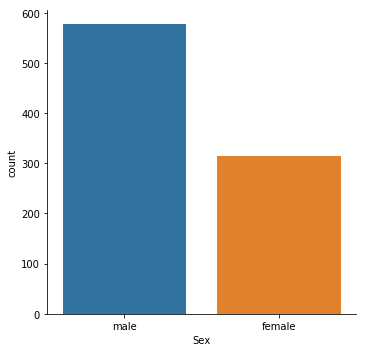

In [39]:
sns.factorplot('Sex',data=train,kind='count');

C:\Users\Avo1d\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


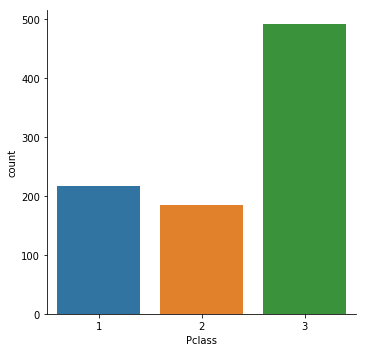

In [40]:
sns.factorplot('Pclass',data=train,kind='count');

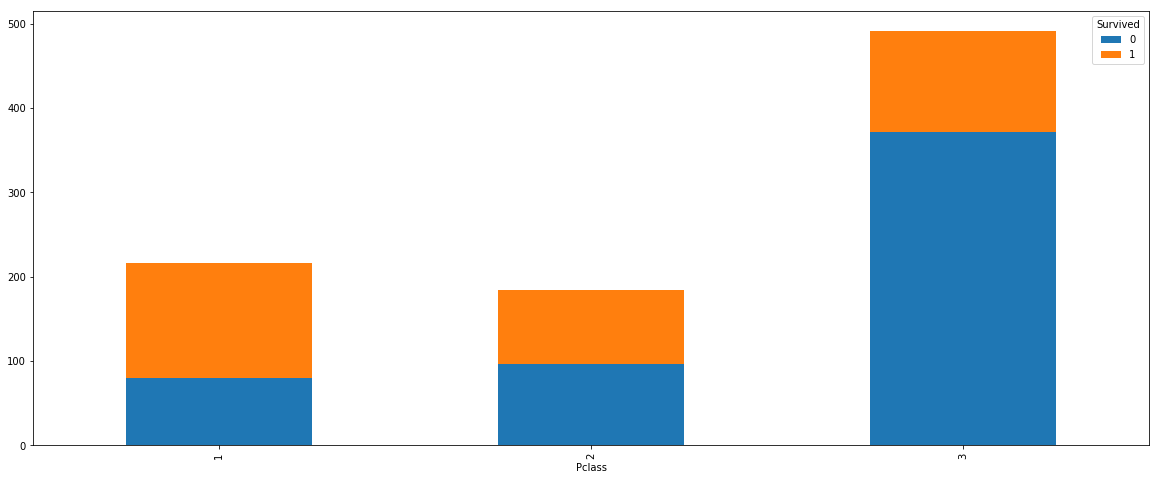

In [41]:
_, ax = plt.subplots(figsize=(20,8))

train.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count').plot(
    kind='bar', stacked=True, ax=ax
)
plt.show()

C:\Users\Avo1d\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


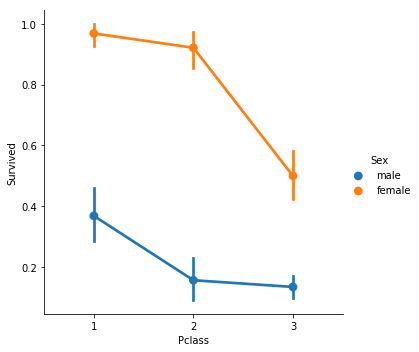

In [42]:
sns.factorplot('Pclass','Survived',data=train,hue='Sex');

In [ ]:
train['Age'].hist(bins=25)
plt.title("Распределение возраста  пассажиров");

In [ ]:
train['Age'].hist(bins=25, normed=True)
train['Age'].plot(kind='kde')

plt.xlim(0, 80)
plt.title("Распределение возраста  пассажиров");

In [ ]:
train['Age'][train.Sex=="male"].hist(alpha=0.6, label="Male")
train['Age'][train.Sex=="female"].hist(alpha=0.6, label="Female")
plt.legend()
plt.title("Распределение возраста  пассажиров");

In [ ]:
train['Age'][train.Sex=="male"].hist(alpha=0.6, label="Male", normed=True)
train['Age'][train.Sex=="female"].hist(alpha=0.6, label="Female", normed=True)
plt.legend()
plt.title("Распределение возраста  пассажиров");

In [ ]:
train[train.Sex=='male']

In [ ]:
_, axes = plt.subplots(2, 2, sharey=True, figsize=(15,12))

sns.boxplot(x='Survived', y='Age', data=train[train.Sex=='male'], ax=axes[0, 0]);
sns.boxplot(x='Survived', y='Age', data=train[train.Sex=='female'], ax=axes[0, 1]);

sns.violinplot(x='Survived', y='Age', data=train[train.Sex=='male'], ax=axes[1, 0]);
sns.violinplot(x='Survived', y='Age', data=train[train.Sex=='female'], ax=axes[1, 1]);

In [ ]:
df_numeric = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
df_numeric['Age'] = df_numeric['Age'].fillna(-1)

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr('kendall'), annot=True);

In [ ]:
df_numeric.hist(figsize=(20, 12));

In [ ]:
sns.pairplot(df_numeric, hue='Survived');